In [1]:
import pandas as pd #For data manipulation, cleaning, and preprocessing tasks.
import numpy as np #For numerical operations and array manipulation.
import matplotlib.pyplot as plt #For creating visualizations and plots.
import seaborn as sns #For creating statistical visualizations and enhancing the aesthetics of plots.

In [3]:
# Load the dataset
loan_train = pd.read_csv('loan_train.csv')
loan_test = pd.read_csv('loan_test.csv')

In [4]:
loan_train.head(7)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,541700,419600.0,26700000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,233300,151600.0,9500000,360.0,1.0,Urban,Y


In [5]:
loan_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban


In [6]:
print(loan_train.shape, loan_test.shape)

(614, 12) (367, 11)


In [7]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [8]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              356 non-null    object 
 1   Married             367 non-null    object 
 2   Dependents          357 non-null    object 
 3   Education           367 non-null    object 
 4   Self_Employed       344 non-null    object 
 5   Applicant_Income    367 non-null    int64  
 6   Coapplicant_Income  367 non-null    int64  
 7   Loan_Amount         367 non-null    int64  
 8   Term                361 non-null    float64
 9   Credit_History      338 non-null    float64
 10  Area                367 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 31.7+ KB


In [9]:
# Step 1: data cleaning and encoding

# Check for missing values
missing_values_train = loan_train.isnull().sum()

print(missing_values_train)

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64


In [10]:
# Handling missing values in categorical variables in loan_train

#categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']

#for col in categorical_columns:
  #  train[col].fillna(train[col].mode()[0], inplace=True)

# Handling missing values in numerical variables
#numerical_columns = ['Term', 'Credit_History']

#for col in numerical_columns:
 #   train[col].fillna(train[col].median(), inplace=True)
    
    

# Handling Missing Values
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_train['Self_Employed'].fillna('No', inplace=True)
loan_train['Loan_Amount'].fillna(loan_train['Loan_Amount'].mean(), inplace=True)
loan_train['Term'].fillna(loan_train['Term'].mode()[0], inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)

In [11]:
# Check for missing values AGAIN
missing_values_train = loan_train.isnull().sum()

print(missing_values_train)

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64


In [12]:
# Encode categorical variables: Convert categorical variables into numerical representations 
loan_train = pd.get_dummies(loan_train)

In [13]:
loan_train.head(8)

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Area_Rural,Area_Semiurban,Area_Urban,Status_N,Status_Y
0,584900,0.0,15000000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,458300,150800.0,12800000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,300000,0.0,6600000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,258300,235800.0,12000000,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,600000,0.0,14100000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
5,541700,419600.0,26700000,360.0,1.0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
6,233300,151600.0,9500000,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
7,303600,250400.0,15800000,360.0,0.0,0,1,0,1,0,...,1,1,0,1,0,0,1,0,1,0


In [14]:
# Delete specific columns from the DataFrames
columns_to_delete = ['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No', 'Status_N']
loan_train = loan_train.drop(columns=columns_to_delete)


In [15]:

# List column names of the Dask DataFrame
column_names = loan_train.columns

print(column_names)

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender_Male', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Self_Employed_Yes', 'Area_Rural', 'Area_Semiurban', 'Area_Urban',
       'Status_Y'],
      dtype='object')


In [16]:
# Rename specific columns in the DataFrames
column_mapping = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 'Self_Employed_Yes': 'Self_Employed', 'Status_Y': 'Status'}
loan_train = loan_train.rename(columns=column_mapping)

In [17]:
# List column names of the Dask DataFrame
column_names = loan_train.columns
print(column_names)

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender', 'Married', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate', 'Self_Employed',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban', 'Status'],
      dtype='object')


In [18]:
# Check for missing values in loan_test
missing_values_test = loan_test.isnull().sum()

print(missing_values_test)

Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Credit_History        29
Area                   0
dtype: int64


In [19]:
# Handling Missing Values in loan_test
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)
loan_test['Self_Employed'].fillna('No', inplace=True)
loan_test['Loan_Amount'].fillna(loan_test['Loan_Amount'].mean(), inplace=True)
loan_test['Term'].fillna(loan_test['Term'].mode()[0], inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0], inplace=True)

In [20]:
# Check for missing values AGAIN
missing_values_test = loan_test.isnull().sum()

print(missing_values_test)

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
dtype: int64


In [24]:
# Encode categorical variables: Convert categorical variables into numerical representations 
loan_test = pd.get_dummies(loan_test)

In [25]:
loan_test.head()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Area_Rural,Area_Semiurban,Area_Urban
0,572000,0,11000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,307600,150000,12600000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,500000,180000,20800000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,234000,254600,10000000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,327600,0,7800000,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [26]:
# List column names of the loan_test DataFrame
column_names_test = loan_test.columns
print(column_names_test)

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Area_Rural', 'Area_Semiurban',
       'Area_Urban'],
      dtype='object')


In [27]:
columns_to_delete_test = ['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No']
loan_test = loan_test.drop(columns=columns_to_delete_test)


column_mapping_test = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 'Self_Employed_Yes': 'Self_Employed'}
loan_test = loan_test.rename(columns=column_mapping_test)

In [28]:
# List column names of the loan_test DataFrame
column_names_test = loan_test.columns
print(column_names_test)

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender', 'Married', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate', 'Self_Employed',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban'],
      dtype='object')


In [29]:
loan_test.head(7)

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed,Area_Rural,Area_Semiurban,Area_Urban
0,572000,0,11000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1
1,307600,150000,12600000,360.0,1.0,1,1,0,1,0,0,1,0,0,0,1
2,500000,180000,20800000,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1
3,234000,254600,10000000,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1
4,327600,0,7800000,360.0,1.0,1,0,1,0,0,0,0,0,0,0,1
5,216500,342200,15200000,360.0,1.0,1,1,1,0,0,0,0,1,0,0,1
6,222600,0,5900000,360.0,1.0,0,0,0,1,0,0,0,0,0,1,0


In [30]:
# STEP 2: Exploratory Data Analysis (EDA)

# Descriptive statistics
# print("Descriptive Statistics:")
# print(loan_train.describe())

# Specify the columns for which you want descriptive statistics
selected_columns = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount']

# Descriptive statistics for the selected columns
selected_data = loan_train[selected_columns]
descriptive_stats = selected_data.describe()

# Display the descriptive statistics
print(descriptive_stats)

       Applicant_Income  Coapplicant_Income   Loan_Amount
count      6.140000e+02        6.140000e+02  6.140000e+02
mean       5.403459e+05        1.621246e+05  1.414104e+07
std        6.109042e+05        2.926248e+05  8.815682e+06
min        1.500000e+04        0.000000e+00  0.000000e+00
25%        2.877500e+05        0.000000e+00  9.800000e+06
50%        3.812500e+05        1.188500e+05  1.250000e+07
75%        5.795000e+05        2.297250e+05  1.647500e+07
max        8.100000e+06        4.166700e+06  7.000000e+07


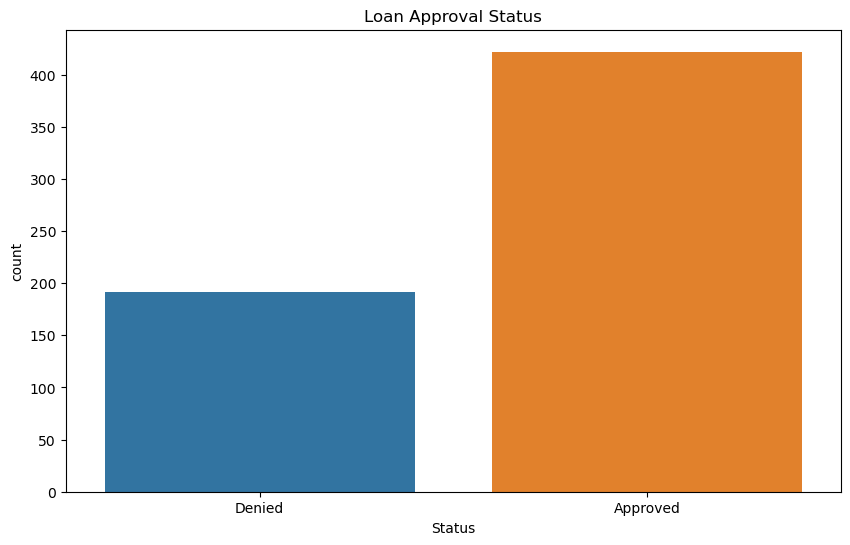

In [31]:
# Analyze the distribution of loan approval status (Loan_Status) to understand the class imbalance, if any.
# Distribution of the target variable

plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=loan_train)
plt.title('Loan Approval Status')
plt.xticks([0, 1], ['Denied', 'Approved'], rotation=0)

plt.show()

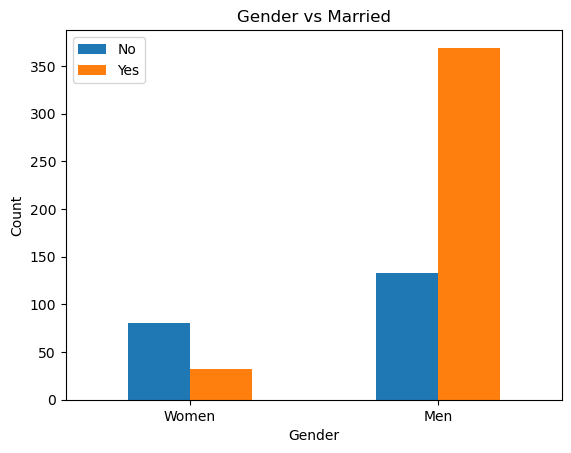

In [35]:
# Gender vs Marriage dynamics of applicants
# Blue denied loans
pd.crosstab(loan_train.Gender, loan_train.Married).plot(kind = "bar", stacked = False)
plt.title('Gender vs Married')
plt.xlabel('Gender') 
plt.ylabel('Count')
plt.xticks([0, 1], ['Women', 'Men'], rotation=0)
plt.legend(['No', 'Yes'])
plt.show()

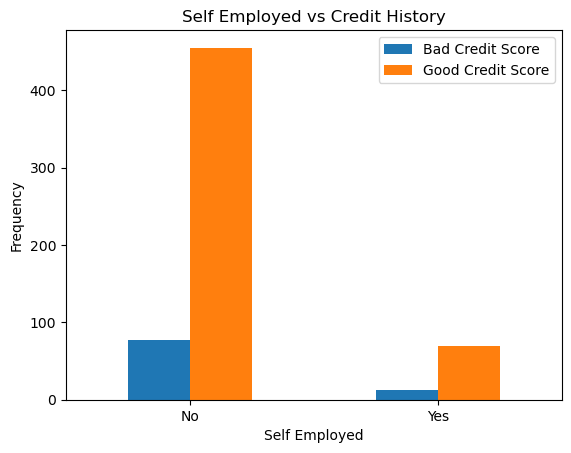

In [36]:
# Self Employed vs Credit History

pd.crosstab(loan_train.Self_Employed, loan_train.Credit_History).plot(kind = "bar", stacked = False)
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit Score", "Good Credit Score"])
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

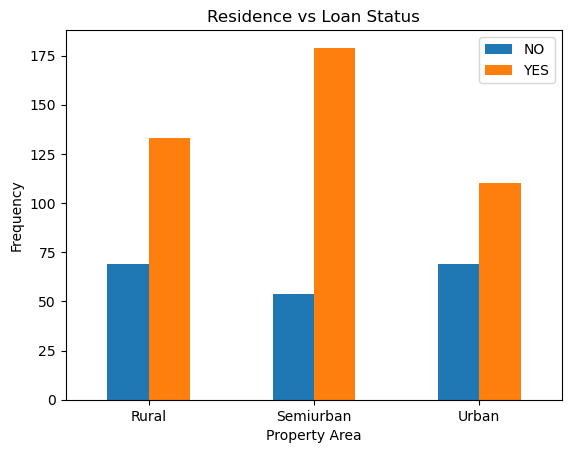

In [37]:
# Create a cross-tabulation of the Area columns and Loan Status
cross_tab = pd.crosstab(index=[loan_train['Area_Rural'], loan_train['Area_Semiurban'], loan_train['Area_Urban']],
                        columns=loan_train['Status'])

# Plot the stacked bar chart
cross_tab.plot(kind='bar', stacked=False)

# Set the plot title, x-label, y-label, and rotation of x-tick labels
plt.title('Residence vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.legend(["NO", "YES"])

plt.xticks([0, 1, 2], ['Rural', 'Semiurban', 'Urban'], rotation=0)

# Display the plot
plt.show()

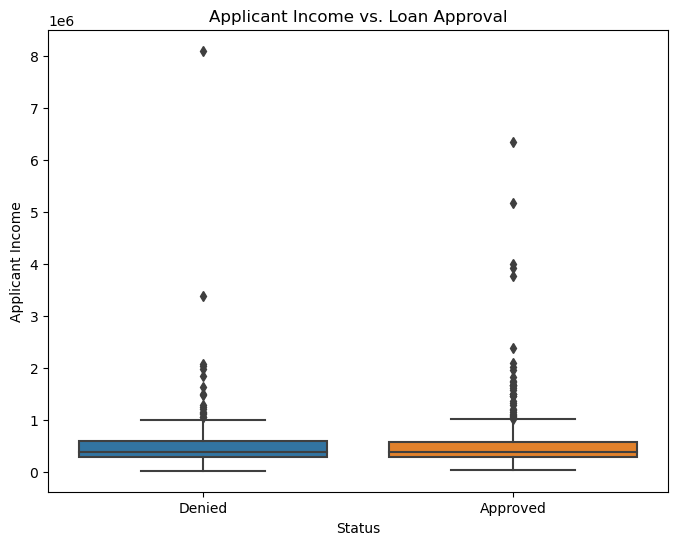

In [40]:
# Distribution of the target variable based on Numerical Data
# Box plot
# Checking outliers in Applicant Income, and the distribution skewness (here we see positive skewness)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Applicant_Income', data=loan_train)
plt.title('Applicant Income vs. Loan Approval')
plt.xlabel('Status') 
plt.ylabel('Applicant Income')
plt.xticks([0, 1], ['Denied', 'Approved'], rotation=0)

plt.show()

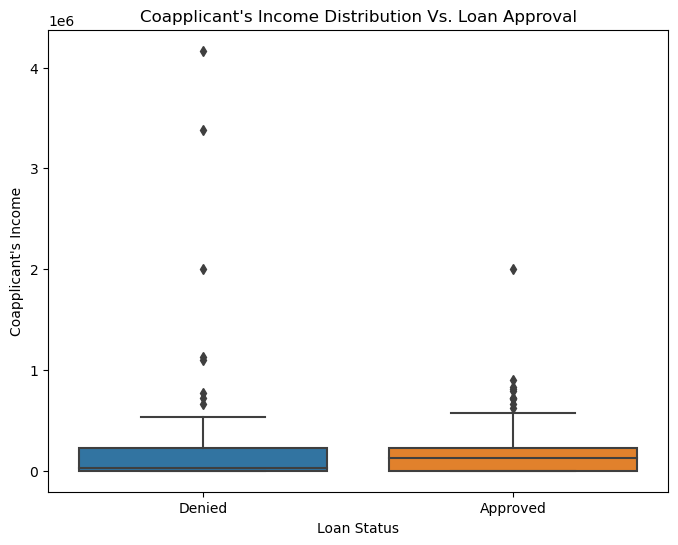

In [41]:
# Checking outliers in Coapplicant's Income, and the distribution skewness (here we see positive skewness)

# Boxplot for Coapplicant's Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Coapplicant_Income', data=loan_train)
plt.title("Coapplicant's Income Distribution Vs. Loan Approval")
plt.xlabel('Loan Status')
plt.ylabel("Coapplicant's Income")
plt.xticks([0, 1], ['Denied', 'Approved'], rotation=0)

plt.show()

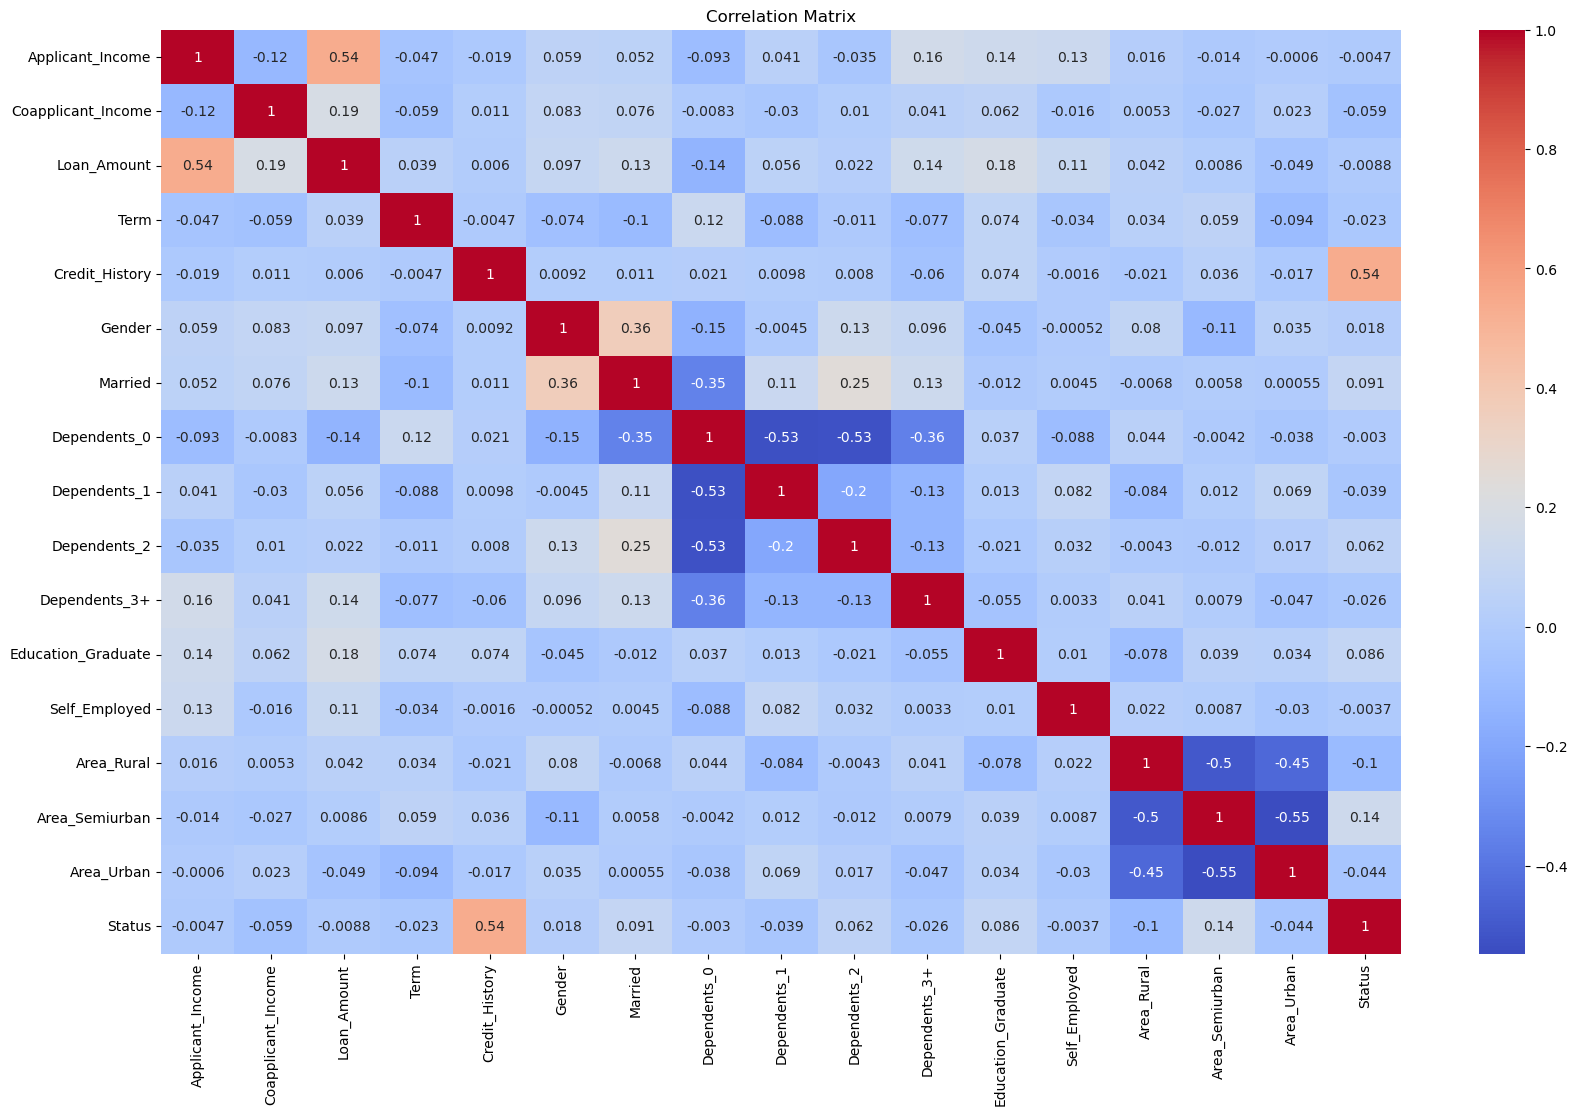

In [43]:
# Correlation matrix
#It provides a measure of the linear relationship between variables, ranging from -1 to 1
# 1: A perfect positive correlation, 0: No correlation, and -1: A perfect negative correlation
#Strength of correlation: Values closer to 1 or -1 indicate a stronger correlation, while values closer to 0 suggest a weaker correlation.
# Correlation does not imply causation
correlation_matrix = loan_train.corr()
# Set up the figure size
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

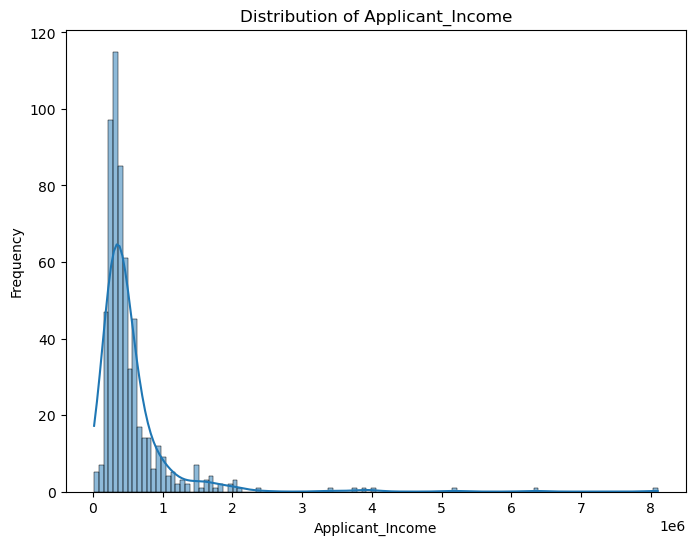

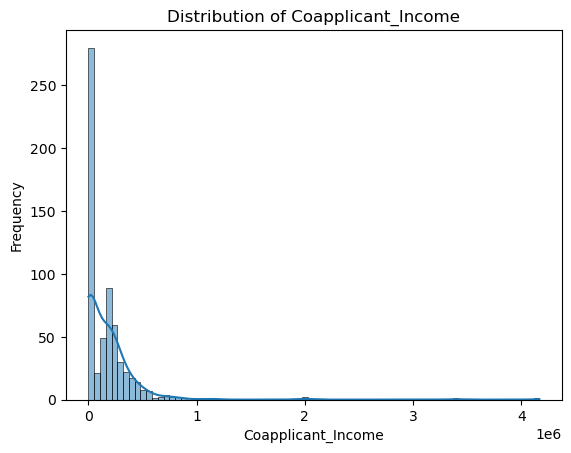

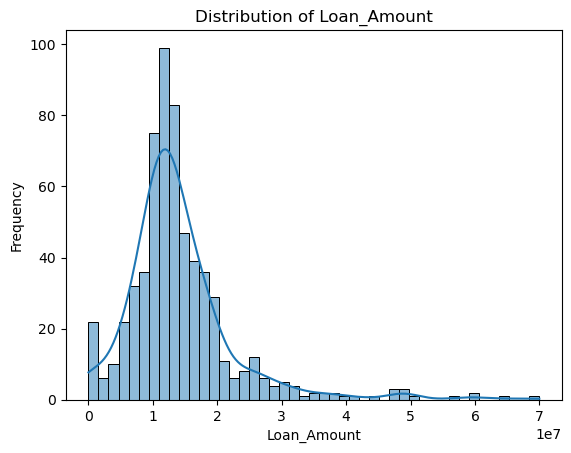

In [45]:
# Distribution of numerical variables


#The code provided is used to plot the distribution of numerical variables in the dataset. Here's the importance of the code:

#Visualizing Data Distribution: The code helps in understanding the distribution of numerical variables such as Applicant Income, Coapplicant Income, and Loan Amount. By plotting histograms with kernel density estimation (KDE), it provides insights into the underlying distribution of these variables.
#Identifying Skewness: The KDE plots can reveal the shape of the distributions, such as whether they are symmetric, positively skewed (long right tail), or negatively skewed (long left tail). Skewness in the data can impact the modeling and analysis process, and these plots allow for a quick visual assessment of skewness.
#Outlier Detection: By examining the histograms, it is possible to identify any potential outliers in the numerical variables. Outliers are data points that deviate significantly from the overall pattern and may require further investigation or preprocessing steps.
#Data Exploration: The plots help in exploring the range, spread, and central tendency of the numerical variables. They provide an overview of the data distribution, allowing analysts to make initial observations and gain insights into the characteristics of the variables.
#Overall, this code is useful for understanding the distributional properties of the numerical variables in the dataset, identifying skewness and outliers, and gaining preliminary insights into the data.


# Specify the numerical columns
numerical_columns = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount']

# Set up the figure size
plt.figure(figsize=(8, 6))

# Plot the distribution of numerical columns
for col in numerical_columns:
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [47]:
#Feature Selection

X = loan_train.drop(['Status'], axis=1)
y = loan_train['Status']

#1. Univariate Feature Selection using chi-square test (for categorical target variable):

from sklearn.feature_selection import SelectKBest, chi2 

# Apply chi-square test for feature selection
selector_chi2 = SelectKBest(score_func=chi2, k=5)
X_chi2 = selector_chi2.fit_transform(X, y)
# Get the selected feature names
selected_features_chi2 = X.columns[selector_chi2.get_support()]

#selector_chi2 = SelectKBest(score_func=chi2, k=5): This line creates a SelectKBest object for performing feature selection using the chi-square test. The score_func parameter is set to chi2, indicating that the chi-square test will be used. The k parameter is set to 5, specifying that the top 5 features will be selected.
#X_chi2 = selector_chi2.fit_transform(X, y): This line applies the chi-square test and selects the top k features from the feature matrix X and the categorical target variable y. The fit_transform method fits the selector on the data and transforms it to return the selected features as a new matrix X_chi2.
#selected_features_chi2 = X.columns[selector_chi2.get_support()]: This line retrieves the selected feature names from the original feature matrix X. The get_support() method returns a boolean mask indicating which features were selected, and indexing X.columns with this mask gives the selected feature names.
#In summary, this code uses the chi-square test to select the top k features that are most significantly associated with the categorical target variable. The selected features can be used for further analysis or modeling, as they are considered to have a strong relationship with the target variable.

print("Selected Features using chi-square test:", selected_features_chi2)


Selected Features using chi-square test: Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Credit_History', 'Area_Semiurban'],
      dtype='object')


In [48]:
# 2. Feature Importance using Random Forest (for both categorical and numerical target variables)

from sklearn.ensemble import RandomForestClassifier 

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X, y)
# Get feature importances
importances = clf.feature_importances_
# Sort feature importances in descending order
feature_importances = sorted(zip(importances, X.columns), reverse=True)
# Select top k features based on importance
k = 5
selected_features = [feature for importance, feature in feature_importances[:k]]
#selected_features_rf = [feature for importance, feature in feature_importances[:5]]

#clf = RandomForestClassifier(): This line creates a Random Forest classifier object.
#clf.fit(X, y): This line fits the classifier on the feature matrix X and the target variable y, training the model.
#importances = clf.feature_importances_: This line retrieves the feature importances calculated by the Random Forest model.
#feature_importances = sorted(zip(importances, X.columns), reverse=True): This line creates a list of tuples, where each tuple contains the feature importance value and the corresponding feature name. The list is sorted in descending order based on the feature importances.
#k = 5: This line sets the value of k as the number of top features to select.
#selected_features = [feature for importance, feature in feature_importances[:k]]: This line extracts the top k features from the sorted feature_importances list. Only the feature names are stored in the selected_features list.
#selected_features_rf = [feature for importance, feature in feature_importances[:5]]: This line is commented out, but it is similar to the previous line and would also select the top 5 features. However, it is not used in the code.
#Overall, this code trains a Random Forest classifier, determines the importance of each feature, and selects the top k features based on their importance. The selected features can be used for further analysis or modeling, as they are considered to be the most influential for the classification task.

print("Selected Features using Random Forest:", selected_features)

Selected Features using Random Forest: ['Credit_History', 'Applicant_Income', 'Loan_Amount', 'Coapplicant_Income', 'Term']


In [50]:
# 3. Recursive Feature Elimination using Logistic Regression (for both categorical and numerical target variables):

from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler

# Perform feature scaling on the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_columns])
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
# Apply Recursive Feature Elimination (RFE)
selector = RFE(model, n_features_to_select=5)
selector.fit(X_scaled, y)
# Get the selected feature names
selected_features_rfe = X[numerical_columns].columns[selector.support_]


#The StandardScaler from scikit-learn is used to perform feature scaling on the numerical features. The fit_transform method is applied to scale the X[numerical_columns] data.
#The max_iter parameter is set to a higher value (1000) when creating the LogisticRegression model, allowing for more iterations to improve convergence.
#The RFE is applied on the scaled features X_scaled and the target variable y using the logistic regression model.
#The selected feature names are obtained using selector.support_, and X.columns is used to retrieve the column names.
#In summary, this code scales the numerical features, applies Recursive Feature Elimination using a Logistic Regression model, and selects the top 5 features based on their importance. The selected features can be used for further analysis or modeling, as they are considered to have the most predictive power according to the Logistic Regression model.

print("Selected Features using Recursive Feature Elimination:", selected_features_rfe)

Selected Features using Recursive Feature Elimination: Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount'], dtype='object')


In [51]:
# 4. Correlation-based Feature Selection (for numerical features)

numerical_columns = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount']
corr_matrix = train[numerical_columns].corr().abs()
# Set a correlation threshold
threshold = 0.7
# Find highly correlated features
highly_correlated = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            highly_correlated.add(colname)
# Remove highly correlated features
selected_features_corr = [col for col in numerical_columns if col not in highly_correlated]

#corr_matrix = train[numerical_columns].corr().abs(): This line calculates the correlation matrix for the numerical columns ('Applicant_Income', 'Coapplicant_Income', and 'Loan_Amount') of the train dataset. The .corr() function computes the pairwise correlation between the columns, and .abs() takes the absolute values of the correlations.
#for i in range(len(corr_matrix.columns)):: This line iterates over the columns of the correlation matrix.
#for j in range(i):: This line sets up a nested loop to iterate over the columns before the current column i to avoid redundant calculations.
#if corr_matrix.iloc[i, j] > threshold:: This line checks if the correlation value between columns i and j is above the threshold.
#colname = corr_matrix.columns[i]: This line retrieves the name of the column i.
#highly_correlated.add(colname): This line adds the column name to the set of highly correlated features.
#selected_features = [col for col in numerical_columns if col not in highly_correlated]: This line creates a list of selected features by filtering out the highly correlated features from the numerical_columns. Only the features that are not present in the highly_correlated set are included in the selected_features list.
#The purpose of this code is to identify and remove highly correlated features among the numerical columns, ensuring that only independent features are considered for further analysis or modeling.


# Print the selected features from each technique
print("Selected Features using Correlation-based Feature Selection:", selected_features_corr)

Selected Features using Correlation-based Feature Selection: ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount']


In [52]:
#Model Selection

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Separate the features and target variable
X = loan_train.drop(['Status'], axis=1)
y = loan_train['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

# Initialize and train different models
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_svc = SVC()

# Train each model
model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_svc.fit(X_train, y_train)

# Predict on the test set and evaluate each model
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_svc = model_svc.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

f1_lr = f1_score(y_test, y_pred_lr)
f1_dt = f1_score(y_test, y_pred_dt)
f1_rf = f1_score(y_test, y_pred_rf)
f1_svc = f1_score(y_test, y_pred_svc)

# Print the accuracy and F1 score for each model
print("Logistic Regression: Accuracy =", accuracy_lr, "F1 Score =", f1_lr)
print("Decision Tree: Accuracy =", accuracy_dt, "F1 Score =", f1_dt)
print("Random Forest: Accuracy =", accuracy_rf, "F1 Score =", f1_rf)
print("Support Vector Machine: Accuracy =", accuracy_svc, "F1 Score =", f1_svc)

Logistic Regression: Accuracy = 0.6976744186046512 F1 Score = 0.8199445983379501
Decision Tree: Accuracy = 0.7162790697674418 F1 Score = 0.7973421926910299
Random Forest: Accuracy = 0.7906976744186046 F1 Score = 0.8623853211009174
Support Vector Machine: Accuracy = 0.7162790697674418 F1 Score = 0.8346883468834688


In [54]:
# Comparing the models above and reccomend the best model based on the highest accuracy or F1 score

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Initialize an empty DataFrame to store the model outputs
model_outputs = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score'])

# Iterate over the models
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Append the results to the DataFrame
    model_outputs = model_outputs.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1}, ignore_index=True)

# Print the model outputs
print(model_outputs)

# Recommend the best model based on the highest accuracy or F1 score
best_model = model_outputs.loc[model_outputs['Accuracy'].idxmax(), 'Model']
print(f"The best model to use is: {best_model}")

                    Model  Accuracy  F1 Score
0     Logistic Regression  0.697674  0.819945
1           Decision Tree  0.702326  0.785235
2           Random Forest  0.781395  0.857143
3  Support Vector Machine  0.716279  0.834688
The best model to use is: Random Forest


In [61]:
predict_data = model_rf.predict(loan_test)
loan_test['Predicted Status']= predict_data


In [63]:
loan_test.head(12)

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Self_Employed,Area_Rural,Area_Semiurban,Area_Urban,Predicted Status
0,572000,0,11000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1
1,307600,150000,12600000,360.0,1.0,1,1,0,1,0,0,1,0,0,0,1,1
2,500000,180000,20800000,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1,1
3,234000,254600,10000000,360.0,1.0,1,1,0,0,1,0,1,0,0,0,1,1
4,327600,0,7800000,360.0,1.0,1,0,1,0,0,0,0,0,0,0,1,0
5,216500,342200,15200000,360.0,1.0,1,1,1,0,0,0,0,1,0,0,1,1
6,222600,0,5900000,360.0,1.0,0,0,0,1,0,0,0,0,0,1,0,1
7,388100,0,14700000,360.0,0.0,1,1,0,0,1,0,0,0,1,0,0,0
8,1363300,0,28000000,240.0,1.0,1,1,0,0,1,0,1,0,0,0,1,1
9,240000,240000,12300000,360.0,1.0,1,0,1,0,0,0,0,0,0,1,0,1
